In [13]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
from pathlib import Path

In [2]:
p = Path('.')
test = p/'test'
norm = p/'NORMAL'
cov = p/'NORMAL'

In [3]:
img_files = get_image_files(test)

In [4]:
scans = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [5]:
dls = scans.dataloaders(p)

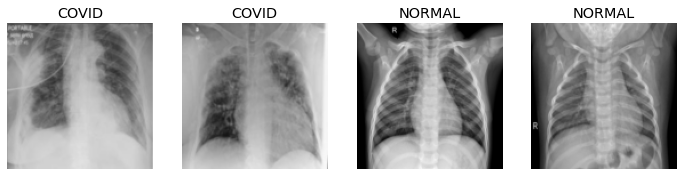

In [6]:
dls.valid.show_batch(max_n=4, nrows=1)

In [7]:
# with ZipFile('NORMAL.zip', 'r') as zipObj:
#     zipObj.extractall()

In [9]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.983102,0.175400,0.083333,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.199796,0.150585,0.033333,00:03
1,0.128541,0.068486,0.033333,00:03
2,0.086840,0.011888,0.000000,00:02
3,0.065150,0.008028,0.000000,00:02


In [10]:
learn.export()

In [11]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [16]:
#hide_output
learn_inf = load_learner(path/'export.pkl')
btn_upload = widgets.FileUpload()
lbl_pred = widgets.Label()
btn_run = widgets.Button(description='Classify')
out_pl = widgets.Output()


def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

VBox([widgets.Label('Upload CXR (will label as NORMAL or COVID)'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [17]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     |████████████████████████████████| 1.9 MB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 552 kB 79.4 MB/s eta 0:00:01
     |████████████████████████████████| 184 kB 55.1 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 3.1 MB/s  eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

nbdev 1.1.5 requires nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
Enabling: voila
- Writing config: /opt/conda/envs/fastai/etc/jupyter
    - Validating...
      voila 0.2.6 OK
